# Лекция 7: Работа с Excel

__Автор: Сергей Вячеславович Макрушин__ e-mail: SVMakrushin@fa.ru 

Финансовый универсиет, 2020 г. 

При подготовке лекции использованы материалы:
* ... (документация)

V 0.1 14.10.2020



<center>         
    <img src="./img/vs1.png" alt="Настройка xlwings в Excel: шаг 2" style="width: 1000px;"/>
    <b>Сравнение инструментов автоматизации труда</b>
</center>

# Excel, инструменты для работы с Excel в python

Для чего используется Excel?
* Интерфейс для ввода и редактирования структурированных данных
* "База данных" - хранилище структурированной информации
* Движок для проведения расчетов и моделирования
* Презентация результатов в виде:
    * табличных отчетов
    * графических отчетов

__Инструменты для чтения/записи в файлы Excel__:

* Файл Excel формата ".xlsx" по сути это zip-архив включающий множество XML файлов формата XML, отформатированные по спецификации Microsoft OOXML (Office Open XML, https://ru.wikipedia.org/wiki/Office_Open_XML).
* По этой спецификации на любом языке программирования можно написать программу напрямую читающую или записывающую данные в файл `.xlsx`. 
* openpyxl работает с файлами Excel именно по такой схеме.


* __openpyxl__ - The recommended package for reading and writing Excel 2010 files (ie: .xlsx)
    * https://openpyxl.readthedocs.io/en/stable/
* __xlsxwriter__ - An alternative package for writing data, formatting information and, in particular, charts in the Excel 2010 format (ie: .xlsx)
* __pyxlsb__ - This package allows you to read Excel files in the xlsb format
* __xlrd__ - This package is for reading data and formatting information from older Excel files (ie: .xls)
* __xlwt__ - This package is for writing data and formatting information to older Excel files (ie: .xls)

__Инструменты для взаимодействия с Excel__


A Microsoft Excel application can be started and controlled by an external program through the Win32 COM API. The pywin32 package provides an interface between Win32 COM and Python. Through a python script with the right pywin32 commands you can fully control an Excel Application (open excel files, query data from cells, write data to cells, save excel files, etc.). The pywin32 commands that you can use mirror the Excel VBA commands, albeit with python syntax.

xlwings is (among other things) a user-friendly wrapper around pywin32. It introduces several concise-yet-powerful methods. An example would be the methods for direct conversion of an excel cell range to a numpy array or pandas dataframe (and vice versa).

__Summary:__ A fundamental difference between xlwings and openpyxl is that the former requires that MS Excel is installed on your machine, whereas the latter does not.


* __xlwings__ - xlwings is an open-source library to automate Excel with Python instead of VBA and works on Windows and macOS: you can call Python from Excel and vice versa and write UDFs in Python (Windows only). xlwings PRO is a commercial add-on with additional functionality.
* __PyXLL__ - PyXLL is a commercial product that enables writing Excel add-ins in Python with no VBA. Python functions can be exposed as worksheet functions (UDFs), macros, menus and ribbon tool bars.

Работа с xlsx из Pandas

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

Основные параметры:
* sheet_name: str, int, list, or None, default 0
Strings are used for sheet names. Integers are used in zero-indexed sheet positions. Lists of strings/integers are used to request multiple sheets. Specify None to get all sheets. Available cases:
    * Defaults to 0: 1st sheet as a DataFrame
    * 1: 2nd sheet as a DataFrame
    * "Sheet1": Load sheet with name “Sheet1”
    * Пример: [0, 1, "Sheet5"]: Load first, second and sheet named “Sheet5” as a dict of DataFrame
    * `None`: All sheets.

* header: int, list of int, default 0
Row (0-indexed) to use for the column labels of the parsed DataFrame. If a list of integers is passed those row positions will be combined into a MultiIndex. Use None if there is no header.

* names: array-like, default None
List of column names to use. If file contains no header row, then you should explicitly pass header=None.

* index_col: int, list of int, default None
Column (0-indexed) to use as the row labels of the DataFrame. Pass None if there is no such column. If a list is passed, those columns will be combined into a MultiIndex. If a subset of data is selected with usecols, index_col is based on the subset.

In [2]:
import pandas as pd

In [3]:
nba = pd.read_excel('nba_xl.xlsx', index_col=0)
nba

,Name,Team,Position,Height (ft),Height(dm),Height(cm),Age,Number,Weight,Salary,College
0,Avery Bradley,Boston Celtics,PG,6.0,2.0,187.96,25.0,0.0,180.0,7730337.0,Texas
1,Jae Crowder,Boston Celtics,SF,6.0,6.0,198.12,25.0,99.0,235.0,6796117.0,Marquette
2,John Holland,Boston Celtics,SG,6.0,5.0,195.58,27.0,30.0,205.0,NaN,Boston University
3,R.J. Hunter,Boston Celtics,SG,6.0,5.0,195.58,22.0,28.0,185.0,1148640.0,Georgia State
4,Jonas Jerebko,Boston Celtics,PF,6.0,10.0,208.28,29.0,8.0,231.0,5000000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,PG,6.0,3.0,190.50,26.0,8.0,203.0,2433333.0,Butler
454,Raul Neto,Utah Jazz,PG,6.0,1.0,185.42,24.0,25.0,179.0,900000.0,NaN
455,Tibor Pleiss,Utah Jazz,C,7.0,3.0,220.98,26.0,21.0,256.0,2900000.0,NaN
456,Jeff Withey,Utah Jazz,C,7.0,0.0,213.36,26.0,24.0,231.0,947276.0,Kansas


In [5]:
nba.to_excel('nba_xl2.xlsx')

# Работа c xlwings 

Возможности xlwings
* https://www.xlwings.org
* __INTERACTION / AUTOMATION__
Leverage Python's scientific stack for interactive data analysis using Jupyter Notebooks, NumPy, Pandas, scikit-learn etc. Or use xlwings to automate Excel reports with Python (Windows & Mac).
* __MACROS AND EXCEL TOOLS__
Write Excel tools with Python instead of VBA and call your code directly from within Excel, e.g. via a button on the sheet. This also works great for prototyping web apps (Windows & Mac).
* __USER DEFINED FUNCTIONS__
Write (array) UDFs in a breeze by taking advantage of all the functionality already available in libraries like NumPy and Pandas. Since v0.10, dynamic array formulas are supported (Windows only).
* __REST API__
Expose your workbooks via REST API and access them from other computers in your corporate intranet or over the web. See the REST API docs.

## Установка и настройка xlwings

* xlwings поставляется c Anaconda. Установка xlwings в остальных случаях:
    * c помощью пакетного менеджера pip: `pip install xlwings`
    * c помощью пакетного менеджера conda: `conda install xlwings`
    * т.к. в релиз в conda может отстатвать на несколько версий от актуального релиза xlwings, можно воспользоваться conda-forge для получения более свежей версии: `conda install -c conda-forge xlwings`
* Настройка Excel для работы с xlwings
    * Для того, чтобы работать с Excel из python не нужно устанавливать add-in, он нужен только для того, чтобы работать с кодом на python из Excel.
    * Also, you can use a single file VBA module instead of the add-in. 

* Для работы с xlwings в Excel нужно выполнить следующую настройку:
1. Открыть панель надстроек: Файл → Параметры →Надстройки → Перейти… → Обзор…

<center>         
    <img src="./img/xlw1.png" alt="Настройка xlwings в Excel: шаг 1" style="width: 700px;"/>
    <b>Настройка xlwings в Excel: шаг 1</b>
</center>

2. Далее идем до нужного файла: Anaconda → Lib → site-packages → xlwings → addin 

<center>         
    <img src="./img/xlw2.png" alt="Настройка xlwings в Excel: шаг 2" style="width: 700px;"/>
    <b>Настройка xlwings в Excel: шаг 2</b>
</center>

3. Открываем файл xlwings, нажимаем ОК.

<center>         
    <img src="./img/xlw3.png" alt="Настройка xlwings в Excel: шаг 3" style="width: 700px;"/>
    <b>Настройка xlwings в Excel: шаг 3</b>
</center>

4. В Exсel становится доступна лента "xlwings":

<center>         
    <img src="./img/xlw4.png" alt="Настройка xlwings в Excel: шаг 4" style="width: 700px;"/>
    <b>Лента "xlwings" в Excel</b>
</center>

* The ribbon of the add-in is compatible with Excel >= 2007 on Windows and >= 2016 on Mac. 
* On Mac, all UDF related functionality is not available.
* Подробнее о параметрах настройки ленты xlwings: https://docs.xlwings.org/en/stable/addin.html#xlwings-addin


Таким образом, для работы с макросами в Excel на языке python пользователю нужно только скачать Анаконду и подключить нужную надстройку в Excel. Для загрузки надстройки нужно выполнить следующие действия:
1.	Открыть панель надстроек: 
Файл → Параметры →Надстройки →Перейти… → Обзор…
2.	 Далее идем до нужного файла:
Anaconda → Lib → site-packages → xlwings → addin 
Открываем файл xlwings, нажимаем ОК.


Для того, чтобы макросы работали надо также в сам файл загрузить модуль «xlwings.bus». Делается это через импортирование файла. Теперь в Excel можно будет работать через скрипты, написанные на языке Python. Но запускать эти скрипты надо через VBA. Делается это с помощью строки в новом модуле:
RunPython "import DimensionConverse".
Здесь после слова import пишется название файла с расширением «.py», в котором хранится код программы. При этом файл с кодом и файл-Excel должны находиться в одной директории.
Таким образом мы можем создать инструмент, позволяющий быстро наполнить базу знаний, автоматизировав написание кода на языке OWL. При этом заполнять данные в файле Excel могут обычные пользователи, которым не обязательно знать сам язык OWL, а только правила по правильному заполнению Excel-файла. 


xlwings addin install

## Работа с Excel из Python

* Быстрый старт: https://docs.xlwings.org/en/stable/quickstart.html
* Документация API: https://docs.xlwings.org/en/stable/api.html

In [343]:
import xlwings as xw

In [344]:
# wb = xw.Book()  # this will create a new workbook
wb = xw.Book('тест1.xlsx')  # connect to an existing file in the current working directory
# wb = xw.Book(r'C:\path\to\file.xlsx')  # on Windows: use raw strings to escape backslashes

In [345]:
# получаем лист книги Excel:
sht = wb.sheets['Лист1']

In [346]:
# изменяем значение в области:
sht.range('A1').value = 'Значение 1'

In [347]:
# читаем значение из области:
sht.range('A1').value

'Значение 1'

xlwings поддерживает работу со следующими типами значений ячеек: `float`, `str`, `None` и `datetime`

In [348]:
v2 = sht.range('A2').value
print(v2) # пустая ячейка

None


In [349]:
sht.range('A2').value = 42

In [350]:
v3 = sht.range('A2').value
v3, type(v3) # тип всех числовых значений float!

(42.0, float)

In [351]:
import datetime as dt

In [352]:
sht.range('A3').value = dt.datetime(2020, 1, 1)

In [353]:
v4 = sht.range('A3').value
v4, type(v4)

(datetime.datetime(2020, 1, 1, 0, 0), datetime.datetime)

### Работа с протяженными диапазонами в xlwings

In [354]:
# работа с диапазоном значений начинающимся в определенной ячейке
# вложенные списки используются для работы с двухмерной структурой листа
sht.range('C2').value = [['Значение 1', 'Значение 2', 'Значение 3'], 
                         [10.0, 20.0, 30.0]]

In [355]:
sht.range('C2').value

'Значение 1'

In [356]:
# expand() позволяет расширить дтапазон до границ заполненной области:
rng1 = sht.range('C2').expand() # или: expand('table') , или: .options(expand='table'); другие варианты: 'down', 'right'
rng1.value

[['Значение 1', 'Значение 2', 'Значение 3'], [10.0, 20.0, 30.0]]

In [357]:
# работа со строкой, начинающейся с C2
sht.range('C2').expand('right').value

['Значение 1', 'Значение 2', 'Значение 3']

In [358]:
# использование явно определенного диапазона:
sht.range('C2:D2').value

['Значение 1', 'Значение 2']

In [359]:
# одномерная строка или столбец представляются в виде одномерного списка:
sht.range('C2:C3').value

['Значение 1', 10.0]

In [360]:
# задание строки значений:
sht.range('G1').value = [1, 2, 3, 4, 5]

In [361]:
# для работы со столбцом вместо строки можно использовать options(transpose=True):
sht.range('G1').options(transpose=True).value = [1, 3, 5, 7, 9]

In [362]:
# для работы с единственным значением, как со списком, можно использовать:
sht.range('G1').options(ndim=1).value

[1.0]

In [363]:
# результат без options(ndim=1):
sht.range('G1').value

1.0

In [364]:
# если препочтительно работать с двухмерной структурой, то:
sht.range('G1').options(ndim=2).value

[[1.0]]

In [365]:
sht.range('G1:G5').options(ndim=2).value

[[1.0], [3.0], [5.0], [7.0], [9.0]]

In [366]:
sht.range('G1:K1').options(ndim=2).value

[[1.0, 2.0, 3.0, 4.0, 5.0]]

In [367]:
sht.range('G1:K5').value

[[1.0, 2.0, 3.0, 4.0, 5.0],
 [3.0, None, None, None, None],
 [5.0, None, None, None, None],
 [7.0, None, None, None, None],
 [9.0, None, None, None, None]]

Для повышение производительности кода рекомендуется уменьшать количество вызывов функций, взаимодействующих с Excel. В частностИ, присваивать и получать сразу весь диапазон, а не собирать его поэлементно или по частям.

__Именованные диапазаоны в Excel__

Именованные диапазоны являются одним из инструментов, упрощающим организацию данных и работу с формулами в Exel. При использовании именованных диапазонов ссылку на диапазон однородных данных не нужно будет записывать в виде адресов границ диапазона, а в виде говорящего имени. Именованные диапазоны позволяют:
* изменять размер и расположение областей не изменяя код работающих с ними скриптов
* упрощают разработку моделей и скриптов за счет документирования на уровне имен: вместо безимянных областей используются говорящие имена.

Работа с именованными диапазонами в Excel:
* Создание именованных диапазонов в Excel (базовый вариант)
* Работа с именованными диапазонами (Формулы -> Диспетчер имен )
* Обнаружение именнованных диапазонов (зум листа)

In [368]:
wb2 = xw.Book('тест2.xlsx')
sht_recipe = wb2.sheets['Рецептура']

In [369]:
recipe1 = sht_recipe.range('рцп_пшеничный_хлеб').value
recipe1[3:-4]

[[1.0,
  'Хлеб Венгерский',
  0.4,
  35.0,
  50.0,
  0.2,
  0.4,
  0.02,
  0.02,
  0.01,
  0.005,
  0.1,
  None,
  None,
  None,
  None,
  None,
  0.3],
 [2.0,
  'Хлеб "Барбари"',
  0.25,
  28.0,
  40.0,
  0.07,
  0.25,
  0.01,
  0.06,
  0.015,
  None,
  0.06,
  0.05,
  None,
  None,
  None,
  None,
  0.2],
 [3.0,
  'Багет парижский',
  0.25,
  35.0,
  50.0,
  0.12,
  0.22,
  0.005,
  None,
  0.009,
  0.005,
  None,
  0.05,
  0.03,
  None,
  None,
  None,
  0.3],
 [4.0,
  'Чиабатта',
  0.25,
  35.0,
  50.0,
  0.12,
  0.23,
  0.01,
  None,
  0.015,
  None,
  None,
  None,
  0.05,
  None,
  None,
  None,
  0.2],
 [5.0,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [6.0,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [7.0,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,

### Работа с  листами

In [370]:
wb.sheets

Sheets([<Sheet [тест1.xlsx]Лист1>])

In [371]:
wb.sheets[0].name

'Лист1'

In [372]:
sht_arr = wb.sheets.add(name="массивы", after=wb.sheets[0].name)

In [373]:
sht_arr

<Sheet [тест1.xlsx]массивы>

Альтернативные способы обратится к данному листу:

In [374]:
# по индексу листа:
wb.sheets[1]

<Sheet [тест1.xlsx]массивы>

In [375]:
# по имени листа:
wb.sheets['Лист1']

<Sheet [тест1.xlsx]Лист1>

In [376]:
# как к активному листу:
wb.sheets.active

<Sheet [тест1.xlsx]массивы>

* add() делает новый лист активным
* функция active() позволяет изменить текущий активный объект

### Работа с  Pandas и NumPy в xlwings

In [377]:
import numpy as np
import pandas as pd

In [378]:
# запись двухмерного массива numpy в диапазон excel:
sht_arr.range('A1').value = np.eye(3)

Для записи массива NumPy и dataframe достаточно указать только верхнюю левую ячейку таблицы.

In [379]:
# представление диапазона excel в виде массива numpy:
sht_arr.range('A1').options(np.array, expand='table').value

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Функция `options()` позволяет задать преобразование для диапазона. Преобразования определяют как диапазон ячеек Excel будет преобразован к значениям во время операций чтения и записи. Если не задвать конвертер, то будет использован конвертер по умолчанию.

Сигнатура: `options(convert=None, **options)`

Parameters:	
* __convert__ (object, default None) – A converter, e.g. `dict`, `np.array`, `pd.DataFrame`, `pd.Series`, defaults to default converter

Keyword Arguments:
* ndim (int, default None) – number of dimensions
* numbers (type, default None) – type of numbers, e.g. `int`
* dates (type, default None) – e.g. `datetime.date` defaults to `datetime.datetime`
* empty (object, default None) – transformation of empty cells
* transpose (Boolean, default False) – transpose values
* expand (str, default None) – One of 'table', 'down', 'right'

For converter-specific options, see Converters and Options: https://docs.xlwings.org/en/stable/converters.html#converters

Returns: Range object

In [380]:
df1 = pd.DataFrame([[1.1, 2.2], [3.3, None]], columns=['one', 'two'])
df1

,one,two
0,1.1,2.2
1,3.3,NaN


In [381]:
sht_arr.range('A10').value = df1

In [382]:
sht_arr.range('A10:C12').options(pd.DataFrame).value

,one,two
0.0,1.1,2.2
1.0,3.3,NaN


In [383]:
sht_arr.range('A10').options(pd.DataFrame, expand='table').value

,one,two
0.0,1.1,2.2
1.0,3.3,NaN


In [384]:
# запись dataframe без индексов
sht_arr.range('A20').options(index=False).value = df1

In [385]:
# запись dataframe без индексов и заголовков:
sht_arr.range('A30').options(index=False, header=False).value = df1

### Продвинутые опции работы с Range

Документация: https://docs.xlwings.org/en/stable/api.html#range

Манипулирование дополнительными атрибутами диапазонов (ячеек):
* цветом диапазонов (ячеек)
* размер и форматирование диапазонов (ячеек) 
* формулами
* добавление и удаление диапазонов (ячеек)

In [386]:
# делаем активным первый лист:
wb.sheets[0].activate()

In [387]:
# обращение к диапазону активного листа не через ссылку на лист:
xw.Range('A1')

<Range [тест1.xlsx]Лист1!$A$1>

In [388]:
# альтернативная форма обращения к листу, по индексу:
xw.Range((1,1))

<Range [тест1.xlsx]Лист1!$A$1>

In [389]:
xw.Range((1,1)).value

'Значение 1'

In [390]:
xw.Range('C2:E3')

<Range [тест1.xlsx]Лист1!$C$2:$E$3>

In [391]:
# Внимание! Первый индекс - индекс строки!
xw.Range((2,3), (3,5))

<Range [тест1.xlsx]Лист1!$C$2:$E$3>

* Цвет ячеек в Excel важный элемент метаинформации (разметки данных)!

Работа с цветом диапазона(ячейки):

In [392]:
xw.Range('A1').color = (255, 0, 0) # формат цвета RGB|

In [393]:
xw.Range('A1').color

(255, 0, 0)

In [394]:
print(xw.Range('A2').color)

None


In [395]:
xw.Range('A2').color == None

True

In [396]:
# удаляем цвет ячейки:
xw.Range('A1').color = None

In [397]:
xw.Range('A2').color is None

True

__Работа с размером и форматированием__

Ширина ячеек (столбцов)

In [398]:
rng_val1 = xw.Range((2,3), (3,5))

In [399]:
rng_val1.value

[['Значение 1', 'Значение 2', 'Значение 3'], [10.0, 20.0, 30.0]]

In [400]:
rng_val1.value[0][0]

'Значение 1'

In [401]:
# способ выбрать первый столбец:
rng_val1.columns[0]

<Range [тест1.xlsx]Лист1!$C$2:$C$3>

In [402]:
rng_val1.columns[0].column_width

8.43

`column_width`

Gets or sets the width, in characters, of a Range. One unit of column width is equal to the width of one character in the Normal style. For proportional fonts, the width of the character 0 (zero) is used.

* If all columns in the Range have the same width, returns the width. If columns in the Range have different widths, returns None.
* column_width must be in the range: 0 <= column_width <= 255
* Note: If the Range is outside the used range of the Worksheet, and columns in the Range have different widths, returns the width of the first column.

In [403]:
# устанавливаем ширину столбца в соответствии с количеством символов в заголовке:
rng_val1.columns[0].column_width = len(rng_val1.value[0][0])

In [404]:
# автоматическое приведение ширины столбца к ширене значений: 
rng_val1.columns[1].autofit()

Имеются аналогичные функции для высоты столбцов и работы со строками.

__Работа с форматом ячейки__

In [405]:
xw.Range('A2').number_format

'Основной'

In [406]:
xw.Range('A3').number_format

'ДД.ММ.ГГГГ'


<center>         
    <img src="./img/format1.png" alt="Определение формата ячейки в Excel" style="width: 500px;"/>
    <b>Определение формата ячейки в Excel</b>
</center>

In [407]:
xw.Range('A2').number_format = '0,00%'

Объединение ячеек

`api.merge(across=False)`
Creates a merged cell from the specified Range object.

Parameters:	
* across (bool, default False) – True to merge cells in each row of the specified Range as separate merged cells.

`api.merge_area` (?? не работает)

Returns a Range object that represents the merged Range containing the specified cell. If the specified cell isn’t in a merged range, this property returns the specified cell.

`api.merge_cells` (?? не работает)

Returns True if the Range contains merged cells, otherwise False

In [408]:
xw.Range('C1:D1').api.merge()

In [409]:
xw.Range('C1').value = 'Первые значения'

Группировка строк и столбцов

* Пример: https://www.automateexcel.com/vba/group-rows-columns/
* Для функций Excel, не реализованных в рамках xlwings, можно получить доступ к api и действовать напрямую.

In [410]:
wb.sheets[0].api.Rows("2:3").Group()

True

__Работа с формулами__

In [411]:
xw.Range('C4').formula = '=1+1'

In [412]:
xw.Range('D4').formula = '=C3+D3'

Для корректного добавления функций нужно использовать их англоязычные аналоги 

* Список сопоставления функций англоязычного / русскоязычного Excel: https://ru.excelfunctions.eu
* Список функций англоязычного Excel: https://support.microsoft.com/en-us/office/excel-functions-alphabetical-b3944572-255d-4efb-bb96-c6d90033e188#bm19

In [413]:
# пример:
xw.Range('E4').formula = '=SUM(C3:E3)'

Для конструирования формул удобно получать строку адрсов:
`get_address(row_absolute=True, column_absolute=True, include_sheetname=False, external=False)`
Returns the address of the range in the specified format. address can be used instead if none of the defaults need to be changed.

Parameters:	
* row_absolute (bool, default True) – Set to True to return the row part of the reference as an absolute reference.
* column_absolute (bool, default True) – Set to True to return the column part of the reference as an absolute reference.
* include_sheetname (bool, default False) – Set to True to include the Sheet name in the address. Ignored if external=True.
* external (bool, default False) – Set to True to return an external reference with workbook and worksheet name.

In [414]:
# получаем адреса диапазона:
rng_name = xw.Range('G1').expand('down').address
rng_name

'$G$1:$G$5'

In [415]:
f'=SUM({rng_name})'

'=SUM($G$1:$G$5)'

In [416]:
xw.Range('F1').formula = f'=SUM({rng_name})'

С помощью xlwings даже можно "протягивать" формулы:

In [417]:
# задаем формулу:
xw.Range('C5').formula = f'=SUM(C3:C4)*$G$5'

In [418]:
# импортируем константу:
from xlwings.constants import AutoFillType

In [419]:
# и протягиваем ее:
xw.Range('C5').api.AutoFill(xw.Range("C5:E5").api,
                               AutoFillType.xlFillDefault)

True

In [420]:
# и получаем результаты расчетов:
xw.Range("C5:E5").value

[108.0, 450.0, 810.0]

In [421]:
# а это формулы, хранящихся в данном диапазоне:
xw.Range("C5:E5").formula

(('=SUM(C3:C4)*$G$5', '=SUM(D3:D4)*$G$5', '=SUM(E3:E4)*$G$5'),)

__Добавление и удаление диапазонов__

In [422]:
sht_cpypst = wb.sheets.add(name="копирование", after=wb.sheets[1].name)

In [423]:
sht_cpypst.range((1,1)).value = np.arange(50).reshape((5, 10))

`copy(destination=None)`
Copy a range to a destination range or clipboard.

Parameters:	
* destination (xlwings.Range) – xlwings Range to which the specified range will be copied. If omitted, the range is copied to the Clipboard.
Returns:	
* Return type: None

---
`paste(paste=None, operation=None, skip_blanks=False, transpose=False)`

Pastes a range from the clipboard into the specified range.

Parameters:	
* paste (str, default None) – One of: 
    * all_merging_conditional_formats
    * all
    * all_except_borders
    * all_using_source_theme
    * column_widths
    * comments
    * formats
    * formulas
    * formulas_and_number_formats
    * validation
    * values
    * values_and_number_formats.
* operation (str, default None) – One of “add”, “divide”, “multiply”, “subtract”.
* skip_blanks (bool, default False) – Set to True to skip over blank cells
* transpose (bool, default False) – Set to True to transpose rows and columns.

Returns:	
* Return type:	`None`

In [424]:
# копи-паст
sht_cpypst.range((1,1), (5,2)).copy()
sht_cpypst.range((6,1), (10,2)).paste()

In [425]:
# прямое копирование:
sht_cpypst.range((1,1), (5,2)).copy(destination=sht_cpypst.range((11,1), (15,2)))

---
`insert(shift=None, copy_origin='format_from_left_or_above')`

Insert a cell or range of cells into the sheet.

Parameters:	
* shift (str, default None) – Use right or down. If omitted, Excel decides based on the shape of the range.
* copy_origin (str, default format_from_left_or_above) – Use format_from_left_or_above or format_from_right_or_below. Note that this is not supported on macOS.

Returns:	
* Return type: None

In [426]:
sht_cpypst.range((1,3), (5,4)).insert()

`clear()`
Clears the content and the formatting of a Range.

---
`delete(shift=None)`
Deletes a cell or range of cells.

Parameters:	
* shift (str, default None) – Use left or up. If omitted, Excel decides based on the shape of the range.
Returns:	
* Return type: `None`

In [427]:
sht_cpypst.range((6,1), (7,2)).clear()

In [428]:
# удалили одну ячейку:
sht_cpypst.range((2,1)).delete()

In [429]:
# # удаление всего столбца:
sht_cpypst.range('2:2').api.Delete()

True

In [430]:
# https://www.automateexcel.com/vba/group-rows-columns/
# sht_cpypst.api.Rows("3:5").Group()

## Интеграция графиков в Excel

Подготовка данных

In [431]:
sht_draw = wb.sheets.add(name="графики", after=wb.sheets[2].name)

In [432]:
sht_draw.range((3,2)).value = 'x-axis'
sht_draw.range((3,3)).value = 'y-axis'

for i in range(5):
    sht_draw.range((i+4, 2)).value = i

In [433]:
for i in range(5):
    sht_draw.range((i+4,3)).value = f'=exp(B{i+4})'

In [434]:
df_draw = xw.Range('B3').expand().options(pd.DataFrame).value
df_draw.reset_index(inplace=True)
df_draw

,x-axis,y-axis
0,0.0,1.000000
1,1.0,2.718282
2,2.0,7.389056
3,3.0,20.085537
4,4.0,54.598150


Создание графика и интеграция его в Excel

In [435]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'y-axis')

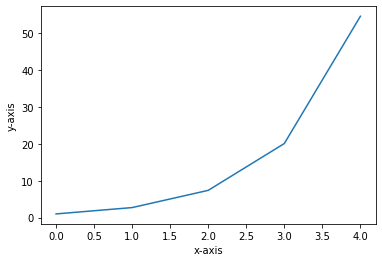

In [436]:
fig = plt.figure()
plt.plot(df_draw['x-axis'], df_draw['y-axis'])
plt.xlabel('x-axis')
plt.ylabel('y-axis')

In [437]:
#add the graph back into Excel:
sht_draw.pictures.add(fig, name='MyPlot', update=True)   

<Picture 'MyPlot' in <Sheet [тест1.xlsx]графики>>

# Создание макросов на xlwings в Excel

1. Создаем в файле `.py` скрипт, который мы хотим вызвать в качестве макроса в Excel

In [438]:
%%writefile rand_10.py
import numpy as np
import xlwings as xw

def generate():
    wb = xw.Book.caller()
    wb.sheets[0].range('A1').value = np.random.rand(10)

Overwriting rand_10.py


Once we have the Python script, open up the VBA Editor, you can do this by pressing Alt + F11 inside the Excel app.

2. Для данного Excel файла настраиваем работу с xlwings (настройка references xlwings):
    1. Открываем редактор VBA (сочетание клавиш: Alt + F11)
    2. В меню Tools -> Reference, выбираем чекбокс "xlwings"

<center>         
    <img src="./img/macr1.png" alt="Настройка работы с xlwings: шаг 1" style="width: 500px;"/>
    <b>Настройка работы с xlwings: шаг 1</b>
</center>


<center>         
    <img src="./img/macr2.png" alt="Настройка работы с xlwings: шаг 2" style="width: 500px;"/>
    <b>Настройка работы с xlwings: шаг 2</b>
</center>


3. В окне VBAProject правой кнопкой щелкаем на файл Excel и вставляем модуль.

<center>         
    <img src="./img/macr3.png" alt="Добавление модуля" style="width: 500px;"/>
    <b>Добавление модуля</b>
</center>

4. Вставляем в модуль следующий код:

```
Sub Rand_10()
    RunPython ("import rand_10; rand_10.generate()")
End Sub
```

Код приводит к выполнению следующего скрипта на Python:
* Импорт модуля rand_10.
* Вызов нашей функции.


5. Сохраняем код на VBA. 

6. Создаем кнопку на листе Excel.
    1. Вкладка "Разработчик" (если необходимо подключаем ее через найстройки), далее Вставить -> Кнопка.

<center>         
    <img src="./img/macr4.png" alt="Определение формата ячейки в Excel" style="width: 500px;"/>
    <b>Определение формата ячейки в Excel</b>
</center>


7. Настраиваем на нажатие кнопки макрос VBA Rand_10()

<center>         
    <img src="./img/macr5.png" alt="Определение формата ячейки в Excel" style="width: 500px;"/>
    <b>Определение формата ячейки в Excel</b>
</center>

8. После нажатия кнопки в дапазоне A1:J1 первого листа появятся сгенерированные значения.

## Создание пользовательских функций Excel на xlwings

__Пользовательские функции__ (user-defined function, UDF) в Excel - функции на VBA, разработанные пользователями. UDF могут использоваться в функциях листов Excel на равне со встроенными функциями.

Создание UDF на VBA не удобно:
* Нужно изучать VBA (язык с очень узкой нишей)
* VBA не удобно использовать 
* VBA обладает очень ограниченной функциональностью

xlwings позволяет создавать собственные UDF на Python:
* используя удобный и мощный язык программирования
* используя многочисленные библиотеки, доступные для Python
* ограничение: на данный момент UDF в xlwings доступны только для Windows

In [439]:
%%writefile my_project.py
import xlwings as xw

# @xw.func is a decorator. 
# It must be added right before the def to let xlwings know this is a user-defined function.
@xw.func
def double_sum(x, y):
    """Returns twice the sum of the two arguments"""
    # The function must return something so the returned value can be passed into Excel
    return 2 * (x + y)

Overwriting my_project.py


1. Для использование настроек по умолчанию должны выполняться следующие требования:
    * файл Excel должен быть в той же директории что и скрипт с UDF
    * имя файла Excel и модуля py должны совпадать (с точностью до расширения файлов)
    
2. Необходимы следующие настройки безопасности:
    * сохранить файл как файл Excel с поддержкой макросов (расширение: .xlsm или .xlsb)
    * установить параметр "Доаверять доступ к объектной модели VBA": Файл -> Параметры -> Центр управления безопасностью -> Параметры центра управления безопасностью -> Параметры макросов -> Доаверять доступ к объектной модели VBA

<center>         
    <img src="./img/udf0.png" alt="Определение формата ячейки в Excel" style="width: 700px;"/>
    <b>Настройка параметра "Доаверять доступ к объектной модели VBA"</b>
</center>

3. В меню xlwings в Excel нажимаем кнопку "Import Functions"
4. После этого используем функцию в необходимой ячейке

<center>         
    <img src="./img/udf1.png" alt="Использование UDF double_sum" style="width: 700px;"/>
    <b>Использование UDF double_sum</b>
</center>


* The __@xw.func decorator__ is only used by xlwings when the function is being imported into Excel. __It tells xlwings for which functions it should create a VBA wrapper__ function, otherwise it has no effect on how the functions behave in Python.

Как переносятся изменения UDF в Excel:

* Code changes in the actual functions are picked up automatically (i.e. at the next calculation of the formula, e.g. triggered by Ctrl-Alt-F9)

* You only need to __re-import your functions if you change__ 
    * the function arguments 
    * the function name.

* but changes in imported modules are not. This is the very behaviour of how Python imports work. If you want to make sure everything is in a fresh state, click __Restart UDF Server__.

## Формулы массива в Excel и создание UDF функций массива

Создание формулы массива 


__Формула массива__ — это формула, с помощью которой можно выполнить несколько расчетов для одного или нескольких элементов в массиве. 
* Они также называются формулами "Ctrl-Shift" или "CSE", так как для их ввода требуется нажать клавиши CTRL + SHIFT + ВВОД.
* Вы можете представить массив как строку или столбец значений либо сочетание строк и столбцов значений. 
* Формулы массива могут возвращать либо несколько результатов, либо один результат.

В Excel существует два типа формул массива: формулы массива, которые выполняют несколько вычислений для создания одного результата и формулы массива, которые рассчитывают несколько результатов. Некоторые функции возвращают массивы значений или требуют массив значений в качестве аргумента. 

* Calling one big array formula in Excel is __much more efficient than calling many single-cell formulas__, so it’s generally a good idea to use them, especially if you hit performance problems.
* You can __pass an Excel Range as a function argument__, as opposed to a single cell and it will show up in Python as list of lists.
* 
For example, you can write the following function to add 1 to every cell in a Range:

In [326]:
%%writefile arr_formula1.py
import xlwings as xw

@xw.func
def add_one(data):
    return [[cell + 1 for cell in row] for row in data]

Writing arr_formula1.py


The above formula has the issue that it expects a “two dimensional” input, e.g. a nested list of the form [[1, 2], [3, 4]]. Therefore, if you would apply the formula to a single cell, you would get the following error: TypeError: 'float' object is not iterable.

In [335]:
%%writefile arr_formula1.py
import xlwings as xw

# декоратор указывает что параметр представляет собой двухмерный массив:
@xw.func
@xw.arg('data', ndim=2)
def add_one(data):
    return [[cell + 1 for cell in row] for row in data]

Overwriting arr_formula1.py


`@xw.arg` and `@xw.ret` decorators

These decorators are to UDFs what the options method is to Range objects: they allow you to __apply converters and their options__ to:
* function arguments (@xw.arg)
* to the return value (@xw.ret). 

For example, to convert the argument x into a pandas DataFrame and suppress the index when returning it, you would do the following:

In [336]:
%%writefile arr_formula1.py
import xlwings as xw
import numpy as np
import pandas as pd

# декоратор указывает что параметр представляет собой двухмерный массив:
@xw.func
@xw.arg('data', ndim=2)
def add_one(data):
    return [[cell + 1 for cell in row] for row in data]

@xw.func
@xw.arg('x', np.array, ndim=2)
@xw.arg('y', np.array, ndim=2)
def matrix_mult(x, y):
    return x @ y

@xw.func
@xw.arg('x', pd.DataFrame, index=False, header=False)
@xw.ret(index=False, header=False)
def CORREL2(x):
    """Like CORREL, but as array formula for more than 2 data sets"""
    return x.corr()

@xw.sub
def my_macro():
    """Writes the name of the Workbook into Range("A1") of Sheet 1"""
    wb = xw.Book.caller()
    wb.sheets[0].range('A1').value = wb.name

Overwriting arr_formula1.py


A great example of how you can put Pandas at work is the creation of an array-based CORREL formula. Excel’s version of CORREL only works on 2 datasets and is cumbersome to use if you want to quickly get the correlation matrix of a few time-series, for example. Pandas makes the creation of an array-based CORREL2 formula basically a one-liner

`@xw.sub` decorator

On Windows, as alternative to calling macros via RunPython, you can also use the @xw.sub decorator.

Under the Developer tab, you can insert a button via Insert > Form Controls. After drawing the button, you will be prompted to assign a macro to it and you can select my_macro.

# Организация данных в виде многомерных кубов

Характеристики OLTP и OLAP

Характеристики OLTP системы
* Большой объем информации
* Часто различные БД для разных подразделений
* Нормализованная схема, отсутствие дублирования информации
* Интенсивное изменение данных
* Транзакционный режим работы
* Транзакции затрагивают небольшой объем данных
* Обработка текущих данных – мгновенный снимок
* Много клиентов
* Малое время отклика – несколько секунд
 
Характеристики OLAP системы
* Большой объем информации
* Синхронизированная информация из различных БД с использованием общих 	классификаторов
* Ненормализованная схема БД с дубликатами
* Данные меняются редко, Изменение происходит через пакетную загрузку 
* Выполняются сложные нерегламентированные запросы над большим объемом данных с 	широким применением группировок и агрегатных функций.
* Анализ временных зависимостей
* Небольшое количество работающих пользователей – аналитики и менеджеры
* Большее время отклика (но все равно приемлемое) – несколько минут

Элементы OLAP-куба

Измерение (dimension) - множество объектов одного или нескольких типов, организованных в виде иерархической структуры и обеспечивающих информационный контекст числового показателя. Измерение принято визуализировать в виде ребра многомерного куба. Объекты, совокупность которых и образует измерение, называются членами измерений (members). Члены измерений визуализируют как точки или участи, откладываемые на осях гиперкуба.

Ячейка (cell) - атомарная структура куба, соответствующая полному набору конкретный значений измерений.

Факт - числовая величина которая располагается в ячейках гиперкуба. Один OLAP-куб может обладать одним или несколькими показателями.

Иерархия - группировка объектов одного измерения в объекты более высокого уровня. Например - день-месяц-год. Иерархии в измерениях необходимы для возможности агрегации и детализации значений показателей согласно их иерархической структуре. Иерархия целиком основывается на одном измерении и формируется из уровней.

Архитектурное решение организации листов операционных / капитальных затрат
